## Imbalanced Dataset

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/imbalanced1.png" width="900">


#### Task
+ Oversampling Techniques
    - RandomOversampling
    - SMOTE
    - ADASYN  

+ Undersampling techniques
    - RandomUndersampler
    - NearMiss

### Expl
+ SMOTE(Synthetic Minority Oversampling TEchnique):The idea is to create new minority examples by interpolating between existing ones. It is important to note a substantial limitation of SMOTE. Because it operates by interpolating between rare examples, it can only generate examples within the body of available examples—never outside. Formally, SMOTE can only fill in the convex hull of existing minority examples, but not create new exterior regions of minority examples.

+ ADASYN:  ADAptive SYNthetic (ADASYN) is based on the idea of adaptively generating minority data samples according to their distributions using K nearest neighbor. The algorithm adaptively updates the distribution and there are no assumptions made for the underlying distribution of the data.  The algorithm uses Euclidean distance for KNN Algorithm. The key difference between ADASYN and SMOTE is that the former uses a density distribution, as a criterion to automatically decide the number of synthetic samples that must be generated for each minority sample by adaptively changing the weights of the different minority samples to compensate for the skewed distributions. The latter generates the same number of synthetic samples for each original minority sample.
+ Tomlinks: Tomek links are pairs of instances of opposite classes who are their own nearest neighbors. In other words, they are pairs of opposing instances that are very close together. Tomek’s algorithm looks for such pairs and removes the majority instance of the pair. The idea is to clarify the border between the minority and majority classes, making the minority region(s) more distinct.     

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/imbalanced2.png" width="900">

### Binary Classification for Income

In [5]:
#!pip install imbalanced-learn -q #già installato su Colab

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import f1_score,matthews_corrcoef

import warnings
warnings.filterwarnings('ignore')

In [71]:
# path = "data/adult_imbalance.csv"
path = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/adult_imbalance.csv"

df = pd.read_csv(path)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,32,2,43403,5,10,2,8,0,0,1,0,1590,54,0,<=50K
1,19,5,182609,1,9,0,11,3,1,1,0,0,25,0,<=50K
2,51,2,332243,0,13,2,3,0,0,0,0,0,45,0,<=50K
3,27,2,158156,1,9,0,4,0,0,1,0,0,42,0,<=50K
4,64,1,170421,5,10,6,6,0,0,1,0,0,8,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20495,65,1,118474,2,7,1,1,1,0,0,9386,0,59,4,>50K
20496,39,2,347960,10,15,0,3,0,0,1,14084,0,35,0,>50K
20497,51,2,204447,5,10,1,3,1,0,0,0,0,45,0,>50K
20498,35,2,36214,0,13,1,1,1,0,0,4386,0,47,0,>50K


In [72]:
df.shape

(20500, 15)

In [73]:
df['class'].value_counts()

,count
class,
<=50K,20000
>50K,500


<Axes: xlabel='class'>

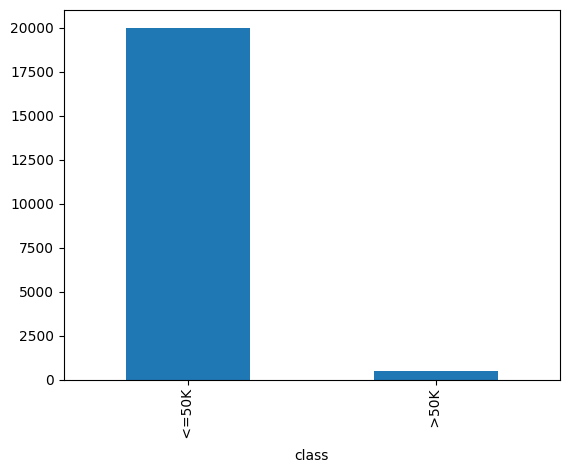

In [10]:
# Value Count/Distribution of Class
df['class'].value_counts().plot(kind='bar')

<Axes: xlabel='class', ylabel='count'>

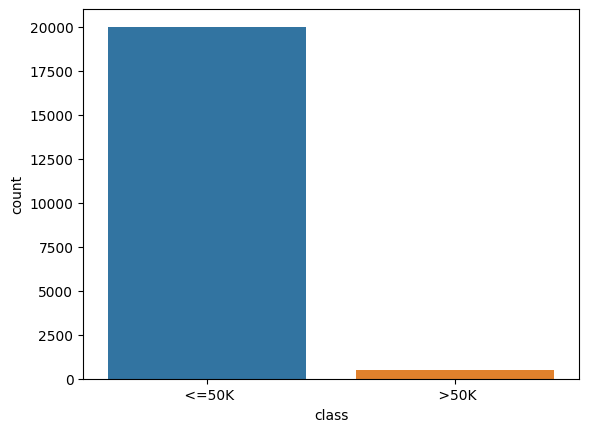

In [11]:
sns.countplot(x='class',data=df, hue ='class')

#### Building A Model
+ Set a baseline for our model
    - Classification (stratification,splitting)
    - Regression (central tendency,mean,median)
    
+ Split our dataset
+ Build Models
+ Evaluate Our model

In [12]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,32,2,43403,5,10,2,8,0,0,1,0,1590,54,0,<=50K
1,19,5,182609,1,9,0,11,3,1,1,0,0,25,0,<=50K
2,51,2,332243,0,13,2,3,0,0,0,0,0,45,0,<=50K
3,27,2,158156,1,9,0,4,0,0,1,0,0,42,0,<=50K
4,64,1,170421,5,10,6,6,0,0,1,0,0,8,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20495,65,1,118474,2,7,1,1,1,0,0,9386,0,59,4,>50K
20496,39,2,347960,10,15,0,3,0,0,1,14084,0,35,0,>50K
20497,51,2,204447,5,10,1,3,1,0,0,0,0,45,0,>50K
20498,35,2,36214,0,13,1,1,1,0,0,4386,0,47,0,>50K


In [13]:
df.dtypes

,0
age,int64
workclass,int64
fnlwgt,int64
education,int64
education_num,int64
marital_status,int64
occupation,int64
relationship,int64
race,int64
sex,int64


In [14]:
df['class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [15]:
class_dict = {' <=50K':0,' >50K':1}
df['class'] = df['class'].map(class_dict)

In [16]:
df.dtypes

,0
age,int64
workclass,int64
fnlwgt,int64
education,int64
education_num,int64
marital_status,int64
occupation,int64
relationship,int64
race,int64
sex,int64


In [17]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'class'],
      dtype='object')

In [18]:
X = df[['age', 'workclass', 'fnlwgt', 'education', 'education_num',
        'marital_status', 'occupation', 'relationship', 'race', 'sex',
        'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
        ]]

y = df['class']

### Setting Base Line for Our Model: Accuracy
+ If our model is improving
+ If we are on track

In [74]:
cv_results = cross_val_score(LogisticRegression(),X,y,cv=5,scoring='accuracy')
cv_results

array([0.97707317, 0.97585366, 0.97707317, 0.97707317, 0.97609756])

In [20]:
np.mean(cv_results)

0.9766341463414634

+ Our baseline for model  is going 0.97
+ Imbalance dataset

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=667,
                                                 stratify=y,
                                                 )

In [76]:
lr_model = LogisticRegression()

lr_model.fit(X_train,y_train)

LogisticRegression()

In [77]:
lr_model.score(X_test,y_test)

0.9770731707317073

In [78]:
y_pred = lr_model.predict(X_test)

In [79]:
accuracy_score(y_test,y_pred)

0.9770731707317073

### Model Evaluation
+ Confusion Matrix
+ F1_score,MCC
+ Classificatio Report (Recall,Precision)

In [80]:
confusion_matrix(y_test,y_pred)

array([[5994,    6],
       [ 135,   15]])

Text(98.33159722222221, 0.5, 'predicted label')

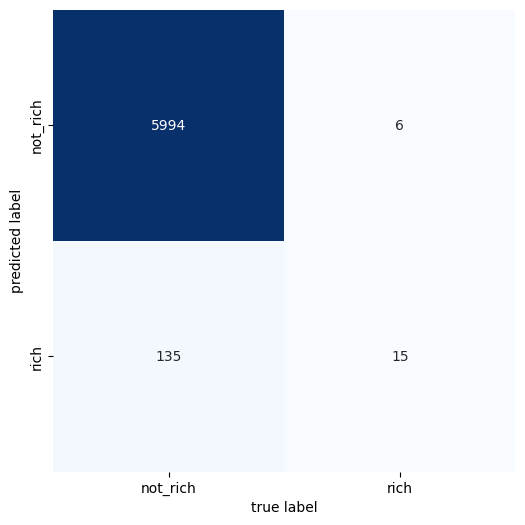

In [81]:
from sklearn.metrics import confusion_matrix

predictions=lr_model.predict(X_test)
mat = confusion_matrix(y_test, predictions)
label = ['not_rich','rich']

plt.figure(figsize=(7,6))
sns.heatmap(mat, square=True, annot=True, cbar=False,cmap='Blues',fmt=".4g",xticklabels=label,yticklabels=label)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6000
           1       0.71      0.10      0.18       150

    accuracy                           0.98      6150
   macro avg       0.85      0.55      0.58      6150
weighted avg       0.97      0.98      0.97      6150



In [29]:
class_dict

{' <=50K': 0, ' >50K': 1}

## Matthews correlation coefficient
The Matthews correlation coefficient is used in machine learning as a measure of the quality of binary and multiclass classifications. It takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. The MCC is in essence a correlation coefficient value between -1 and +1. A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction. The statistic is also known as the phi coefficient
+ MCC
    - (+1) :perfect model
    - (-1): not a good model
    - (0): randomly guessing


+ The High the better
+ Precision:
    -lower precision means there higher/many false positive
+ Recall:
    -lower recall means there are higher/many false negative

In [30]:
matthews_corrcoef(y_test,y_pred)

0.26178935993312946

#### Fixing Our Imbalance Dataset
+ Oversampling
+ Undersampling
+ Combine both

## Oversampling with RandomOverSampler
RandomOverSampler is the simplest oversampling technique for handling imbalanced datasets. Here's how it works:

#### Basic Mechanism:
Randomly duplicates samples from the minority class
Keeps all majority class samples unchanged
Samples are selected with replacement

#### Advantages:
Simple and fast implementation
No complex sample generation
Preserves original distribution
Works with any type of data
#### Limitations:
Can lead to overfitting
No new information added
Exact duplicates may cause problems
May not generalize well

In [82]:
### Function to Build Model
def build_model(Estimator,x_train,y_train):
    model = Estimator
    model.fit(x_train,y_train)
    return model

# Fxn to Evaluate Model
def evaluate_model(model,x_test,y_test):
    accuracy = model.score(x_test,y_test)
    y_pred_for_model = model.predict(x_test)
    conf_matrix = confusion_matrix(y_test,y_pred_for_model)
    f1score = f1_score(y_test,y_pred_for_model)
    mcc = matthews_corrcoef(y_test,y_pred_for_model)
    results = {'accuracy':accuracy,'f1_score':f1score,'mcc':mcc}
    print("====Confusion Matrix====")
    print(conf_matrix)
    print(classification_report(y_test,y_pred_for_model))
    print("Results")
    return results

In [83]:
dt_model = build_model(DecisionTreeClassifier(),X_train,y_train)

In [84]:
evaluate_model(dt_model,X_test,y_test)

====Confusion Matrix====
[[5857  143]
 [ 101   49]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6000
           1       0.26      0.33      0.29       150

    accuracy                           0.96      6150
   macro avg       0.62      0.65      0.63      6150
weighted avg       0.97      0.96      0.96      6150

Results


{'accuracy': 0.9603252032520325,
 'f1_score': 0.28654970760233917,
 'mcc': 0.2686111695822782}

In [85]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='minority',
                        random_state=667,
                        )

In [35]:
X_ros,y_ros = ros.fit_resample(X,y)

In [86]:
from collections import Counter

print("Original",X.shape)
print("Balanced X",X_ros.shape)
print("Original Y",Counter(y))
print("Balanced Y",Counter(y_ros))

Original (20500, 14)
Balanced X (40000, 14)
Original Y Counter({0: 20000, 1: 500})
Balanced Y Counter({0: 20000, 1: 20000})


In [87]:
# Baseline for Balanced Dataset
# using CV
cv_results = cross_val_score(LogisticRegression(),X_ros,y_ros,cv=5,scoring='accuracy')

In [88]:
np.mean(cv_results)

0.664925

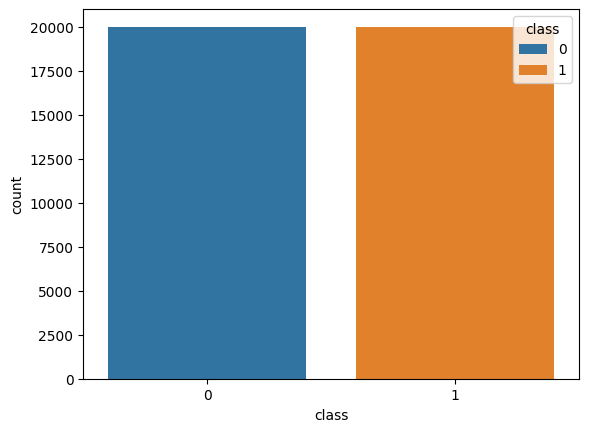

In [89]:
sns.countplot(x=y_ros,hue =y_ros );

In [90]:
# Split dataset

X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros,y_ros,
                                                                    test_size=0.3,
                                                                    random_state=667,
                                                                    stratify=y_ros,
                                                                    )

In [91]:
# LogisticRegression Model For Balanced dataset usinng RoS

lr_model_ros = build_model(LogisticRegression(),X_train_ros,y_train_ros)

In [92]:
evaluate_model(lr_model_ros,X_test_ros,y_test_ros)

====Confusion Matrix====
[[4070 1930]
 [1817 4183]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.68      6000
           1       0.68      0.70      0.69      6000

    accuracy                           0.69     12000
   macro avg       0.69      0.69      0.69     12000
weighted avg       0.69      0.69      0.69     12000

Results


{'accuracy': 0.68775,
 'f1_score': 0.6906629241310989,
 'mcc': 0.3755666116025423}

Text(98.33159722222221, 0.5, 'predicted label')

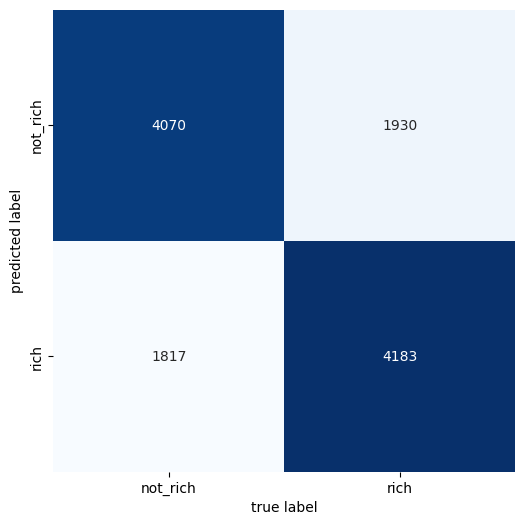

In [94]:
from sklearn.metrics import confusion_matrix

predictions=lr_model_ros.predict(X_test_ros)
mat = confusion_matrix(y_test_ros, predictions)
label = ['not_rich','rich']

plt.figure(figsize=(7,6))
sns.heatmap(mat, square=True, annot=True, cbar=False,cmap='Blues',fmt=".4g",xticklabels=label,yticklabels=label)
plt.xlabel('true label')
plt.ylabel('predicted label')

## OverSampling SMOTE: Synthetic Minority Oversampling Technique
SMOTE is a powerful oversampling technique that creates synthetic samples of the minority class.

### Basic SMOTE Algorithm:

For each minority class sample:
- Find k nearest minority class neighbors
- Randomly select one of these neighbors
- Create synthetic sample along the line between the sample and its neighbor
- Repeat until desired balance is achieved

### Variants:

a) Regular SMOTE:

Creates synthetic samples anywhere between minority instances
Uses all minority samples equally

b) Borderline SMOTE-1:

Identifies minority samples on the border of the classes
Only generates synthetic samples from borderline cases
More focused on decision boundary

c) Borderline SMOTE-2:

Similar to Borderline-1 but also considers majority neighbors
Can generate samples slightly further into majority class space

#### Key Parameters:
k_neighbors: Number of nearest neighbors (default=5)
sampling_strategy: Target ratio between classes
random_state: For reproducibility
kind: Type of SMOTE ('regular', 'borderline1', 'borderline2')

#### Advantages:
Creates meaningful synthetic samples
Avoids overfitting compared to random oversampling
Multiple variants for different scenarios
Works well with many classifiers

#### Limitations:
May create noisy samples
Can increase overlap between classes
Computationally more expensive than random oversampling
May not work well with high-dimensional data

In [95]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority',
              random_state=667,
              )

In [96]:
# Fit And Resample
X_sm, y_sm = smote.fit_resample(X,y)

In [97]:
print("Original",X.shape)
print("Balanced X",X_sm.shape)
print("Original Y",Counter(y))
print("Balanced Y",Counter(y_sm))

Original (20500, 14)
Balanced X (40000, 14)
Original Y Counter({0: 20000, 1: 500})
Balanced Y Counter({0: 20000, 1: 20000})


In [98]:
# Split dataset
X_train_sm,X_test_sm,y_train_sm,y_test_sm = train_test_split(X_sm,y_sm,
                                                             test_size=0.3,
                                                             random_state=667,
                                                             stratify=y_sm,
                                                             )


In [99]:
# Build A Model For LR with Smoted Balanced Dataset
lr_model_sm  = build_model(LogisticRegression(),X_train_sm,y_train_sm)

In [100]:
# Evaluate Model
evaluate_model(lr_model_sm,X_test_sm,y_test_sm)

====Confusion Matrix====
[[4225 1775]
 [1746 4254]]
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      6000
           1       0.71      0.71      0.71      6000

    accuracy                           0.71     12000
   macro avg       0.71      0.71      0.71     12000
weighted avg       0.71      0.71      0.71     12000

Results


{'accuracy': 0.7065833333333333,
 'f1_score': 0.7072907141075734,
 'mcc': 0.4131714927674279}

In [101]:
#### Fxn to Fix Imbalance
def fix_imbalance(imb_Transformer,X,y):
    imb_method = imb_Transformer
    X_resampled,y_resampled = imb_method.fit_resample(X,y)
    print("Original",X.shape)
    print("Balanced X",X_resampled.shape)
    print("Original Y",Counter(y))
    print("Balanced Y",Counter(y_resampled))
    return X_resampled,y_resampled


## Oversampling with ADASYN



<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*dOHFA1ffNyKbQ55Vw0PNzA.png" width="900">

### ADASYN (Adaptive Synthetic)
ADASYN is an advanced oversampling technique that improves upon SMOTE by adaptively generating synthetic samples based on the density distribution of minority class instances. Here's how it works:

#### **Key Mechanism:**
Calculates density distribution for minority class instances
Generates more synthetic samples in regions where minority class density is lower
Uses k-nearest neighbors to determine local density
Adaptively determines the number of synthetic samples for each minority instance

#### **Algorithm Steps:**

Calculate the degree of class imbalance
For each minority instance:

Find its k-nearest neighbors
Calculate the ratio of majority class samples in these neighbors
Normalize these ratios to create a probability distribution
Generate synthetic samples based on these probabilities

#### **Advantages:**

Adaptive learning of difficult areas
Focuses on boundary regions
Reduces bias introduced by class imbalance
Better handling of difficult-to-learn samples

#### **Parameters:**

n_neighbors: Controls density estimation (default=5)
sampling_strategy: Desired ratio of classes
random_state: For reproducibility


#### **Key Differences from SMOTE:**

Adaptive generation of synthetic samples
Focus on harder-to-learn examples
Better handling of noise
More intelligent sample generation

In [102]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN()

X_ada,y_ada = fix_imbalance(adasyn,X,y)

Original (20500, 14)
Balanced X (39877, 14)
Original Y Counter({0: 20000, 1: 500})
Balanced Y Counter({0: 20000, 1: 19877})


In [103]:
### Split Dataset
X_train_ada,X_test_ada,y_train_ada,y_test_ada = train_test_split(X_ada,y_ada,
                                                                 test_size=0.3,
                                                                 random_state=667,
                                                                 stratify=y_ada,
                                                                 )



In [104]:
lr_model_ada  = build_model(LogisticRegression(),X_train_ada,y_train_ada)

evaluate_model(lr_model_ada,X_test_ada,y_test_ada)

====Confusion Matrix====
[[3998 2002]
 [1551 4413]]
              precision    recall  f1-score   support

           0       0.72      0.67      0.69      6000
           1       0.69      0.74      0.71      5964

    accuracy                           0.70     11964
   macro avg       0.70      0.70      0.70     11964
weighted avg       0.70      0.70      0.70     11964

Results


{'accuracy': 0.7030257438983617,
 'f1_score': 0.7129816624929316,
 'mcc': 0.40733964449739896}

+ Using the SMOTE gave us a higher f1_score,accuracy
+ Had a higher MCC Score of 0.42 and for the ADASYN we had 0.40

## Using Undersampling


In [105]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,32,2,43403,5,10,2,8,0,0,1,0,1590,54,0,<=50K
1,19,5,182609,1,9,0,11,3,1,1,0,0,25,0,<=50K
2,51,2,332243,0,13,2,3,0,0,0,0,0,45,0,<=50K
3,27,2,158156,1,9,0,4,0,0,1,0,0,42,0,<=50K
4,64,1,170421,5,10,6,6,0,0,1,0,0,8,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20495,65,1,118474,2,7,1,1,1,0,0,9386,0,59,4,>50K
20496,39,2,347960,10,15,0,3,0,0,1,14084,0,35,0,>50K
20497,51,2,204447,5,10,1,3,1,0,0,0,0,45,0,>50K
20498,35,2,36214,0,13,1,1,1,0,0,4386,0,47,0,>50K


<Axes: xlabel='class', ylabel='count'>

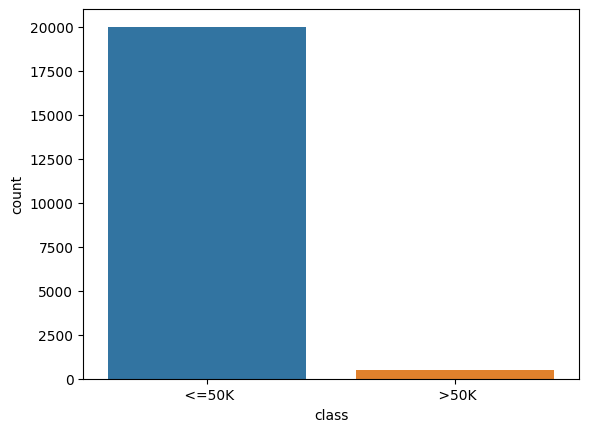

In [106]:
sns.countplot(x='class',data=df,hue='class')

### RandomUnderSampler:
RandomUnderSampler is one of the simplest undersampling techniques for handling imbalanced datasets. Here's how it works:

#### Basic Mechanism:

Randomly removes samples from the majority class
Keeps all minority class samples
Samples are selected without replacement

In [107]:
from imblearn.under_sampling import RandomUnderSampler

X_rus,y_rus = fix_imbalance(RandomUnderSampler(sampling_strategy='majority',random_state=667),X,y)

Original (20500, 14)
Balanced X (1000, 14)
Original Y Counter({0: 20000, 1: 500})
Balanced Y Counter({0: 500, 1: 500})


<Axes: xlabel='class', ylabel='count'>

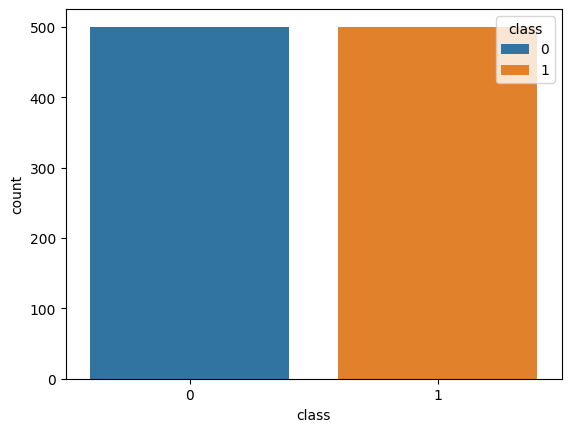

In [108]:
sns.countplot(x=y_rus,hue=y_rus)

In [57]:
### Base Line For Model

In [109]:
cv_result_rus = cross_val_score(LogisticRegression(),X_rus,y_rus,cv=5,scoring='accuracy')

In [110]:
cv_result_rus

array([0.655, 0.64 , 0.655, 0.685, 0.685])

In [111]:
np.mean(cv_result_rus)

0.6639999999999999

In [112]:
### Split Dataset
X_train_rus,X_test_rus,y_train_rus,y_test_rus = train_test_split(X_rus,y_rus,
                                                                 test_size=0.3,
                                                                 random_state=667,
                                                                 stratify=y_rus,
                                                                 )

In [113]:
# Build A Model For LR with RandomUndersample Balanced Dataset
lr_model_rus  = build_model(LogisticRegression(),X_train_rus,y_train_rus)

# Evaluate Model
evaluate_model(lr_model_rus,X_test_rus,y_test_rus)

====Confusion Matrix====
[[ 98  52]
 [ 42 108]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       150
           1       0.68      0.72      0.70       150

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.69      0.69      0.69       300

Results


{'accuracy': 0.6866666666666666,
 'f1_score': 0.6967741935483871,
 'mcc': 0.37416573867739417}

### Undersampling with Tomlinks
Tomek links are pairs of instances of opposite classes who are their own nearest neighbors. In other words, they are pairs of opposing instances that are very close together.

Tomek link is a pair of instances (x₁, x₂) from different classes where x₁ is the nearest neighbor of x₂ and vice versa.
#### Key Properties:

Only instances from different classes can form Tomek links
They typically occur at class boundaries
Both instances in a Tomek link must be each other's nearest neighbor

#### The Algorithm:

Identifies all pairs of samples that form Tomek links
Removes the majority class instance from each pair
Keeps all minority class instances unchanged


#### Advantages:

Improves class separation by cleaning up class boundaries
Reduces noise and overlap between classes
Preserves all minority samples
Can be used as a data cleaning tool even for balanced datasets


#### Limitations:

Only removes majority samples that form Tomek links
May not address imbalance sufficiently if few Tomek links exist
Computationally expensive for large datasets (requires calculating distances between all pairs)

In [114]:
from imblearn.under_sampling import TomekLinks

X_tom,y_tom = fix_imbalance(TomekLinks(),X,y)

Original (20500, 14)
Balanced X (20240, 14)
Original Y Counter({0: 20000, 1: 500})
Balanced Y Counter({0: 19740, 1: 500})


<Axes: xlabel='class', ylabel='count'>

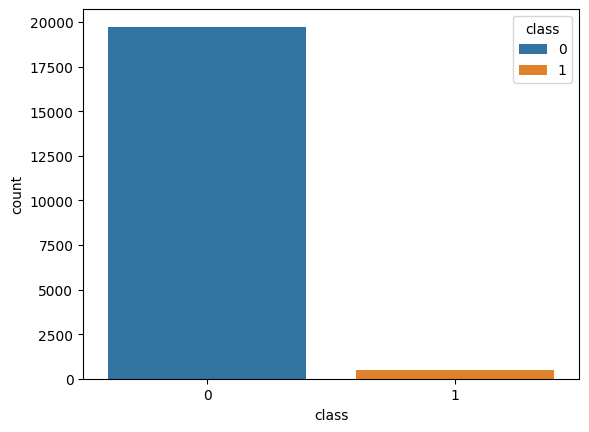

In [115]:
sns.countplot(x=y_tom,hue=y_tom)

In [116]:
### Split Dataset
X_train_tom,X_test_tom,y_train_tom,y_test_tom = train_test_split(X_tom,y_tom,
                                                                 test_size=0.3,
                                                                 random_state=667,
                                                                 stratify=y_tom,
                                                                 )


In [117]:
lr_model_tom  = build_model(LogisticRegression(),X_train_tom,y_train_tom)
# Evaluate Model
evaluate_model(lr_model_tom,X_test_tom,y_test_tom)

====Confusion Matrix====
[[5920    2]
 [ 143    7]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5922
           1       0.78      0.05      0.09       150

    accuracy                           0.98      6072
   macro avg       0.88      0.52      0.54      6072
weighted avg       0.97      0.98      0.97      6072

Results


{'accuracy': 0.9761198945981555,
 'f1_score': 0.0880503144654088,
 'mcc': 0.18692491134909445}

## Using NearMiss
NearMiss is a systematic undersampling technique that reduces the majority class samples based on their distance to minority class samples. There are three main versions of NearMiss:

- NearMiss-1:
Selects majority class samples that have the smallest average distance to the k nearest minority class samples
Good for clean data with well-defined class boundaries
Preserves boundary samples that are important for classification

- NearMiss-2:
Selects majority class samples that have the smallest average distance to the k farthest minority class samples
More robust to noise compared to NearMiss-1
Helps maintain class separation

- NearMiss-3:
Two-step process that first selects m nearest neighbors from the minority class for each majority sample
Then selects majority samples with the largest average distance to these selected neighbors
Helps maintain both class separation and distribution

#### Key advantages of NearMiss:

Maintains important samples near the decision boundary
Reduces storage and computational requirements
Helps combat class imbalance effectively

#### Key limitations:

Can be sensitive to noise
May remove potentially useful majority samples
Performance depends on the version chosen and parameter settings

In [118]:
from imblearn.under_sampling import NearMiss

X_nm,y_nm = fix_imbalance(NearMiss(),X,y)

Original (20500, 14)
Balanced X (1000, 14)
Original Y Counter({0: 20000, 1: 500})
Balanced Y Counter({0: 500, 1: 500})


In [119]:
### Split Dataset
X_train_nm,X_test_nm,y_train_nm,y_test_nm = train_test_split(X_nm,y_nm,
                                                             test_size=0.3,
                                                             random_state=667,
                                                             stratify=y_nm,
                                                             )

In [120]:
# Build A Model For LR with RandomUndersample Balanced Dataset
lr_model_nm  = build_model(LogisticRegression(),X_train_nm,y_train_nm)

evaluate_model(lr_model_nm,X_test_nm,y_test_nm)

====Confusion Matrix====
[[115  35]
 [ 50 100]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.73       150
           1       0.74      0.67      0.70       150

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300

Results


{'accuracy': 0.7166666666666667,
 'f1_score': 0.7017543859649122,
 'mcc': 0.4355163866123252}